# Importation Bibliothèques

In [1]:
import gymnasium as gym
import bbrl_gymnasium
from moviepy.editor import ipython_display as video_display
from RewardWrapper import RewardWrapper
from Algorithms import PrioritizedReplayAgent
import matplotlib.pyplot as plt

from LargestFirst import LargestFirst
from RandomDyna import RandomDyna
from FocusedDyna import FocusedDyna

import pandas as pd
import numpy as np

Matplotlib backend: module://matplotlib_inline.backend_inline


# Paramètres

In [2]:
EPSILON= 0.5  # parametres pour gerer l'exploration dans EPSILONgreedy
DELTA = 0.01  #treshold
gamma = 0.95  #discount factor
ALPHA = 0.5   #learning rate
MAX_STEP = 1000#nombre de pas maximum pour un episode

# Définition des labyrinthes

In [3]:
# environnement 9x6 
env_9x6 = gym.make("MazeMDP-v0", kwargs={"width": 9, "height": 6,
"start_states": [2], "walls": [13, 14, 15, 34, 42, 43, 44],
"terminal_states": [41]}, render_mode="rgb_array")

env_9x6.metadata['render_fps'] = 1
env_9x6 = RewardWrapper(env_9x6)
env_9x6.reset()

env_9x6.set_no_agent()
env_9x6.init_draw("The maze 9x6")

# environnement 18x12
env_18x12 = gym.make("MazeMDP-v0", kwargs={"width": 18, "height": 12,
"start_states": [4], "walls": [50,51,52,53,54,62,63,64,65,66, 128,129,140,141,168,169,170,171,172,173,180,181,182,183,184,185],
"terminal_states": [166,167,178,179]}, render_mode="rgb_array")

env_18x12.metadata['render_fps'] = 1
env_18x12 = RewardWrapper(env_18x12)
env_18x12.reset()

env_18x12.set_no_agent()
env_18x12.init_draw("The maze 18x12")


Output()

Output()

# Largest First Dyna

### Queue Dyna Priority Based on Prediction Difference Magnitude

In [4]:
QueueDyna = LargestFirst(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = True, episode= 100)
QueueDyna.execute()


Output()

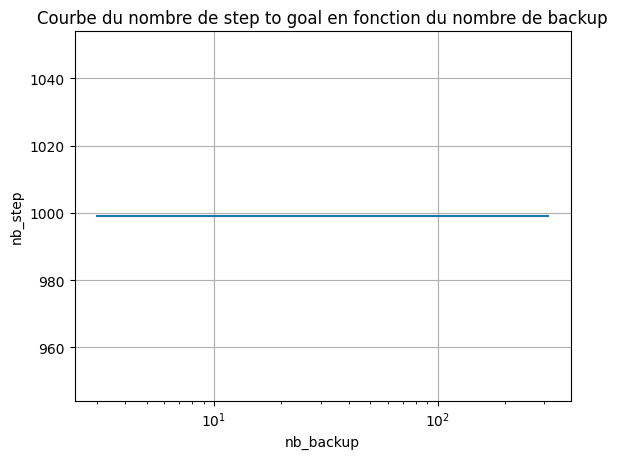

In [5]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Random Dyna

Output()

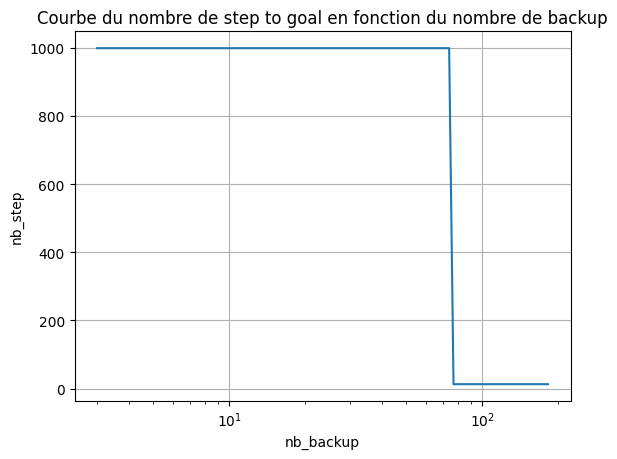

In [6]:
RDyna = RandomDyna(env_9x6, ALPHA, DELTA, EPSILON, MAX_STEP, render = True, episode= 100)
RDyna.execute()

data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)

plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()


# Focused Dyna

In [7]:
FocusedDyna = FocusedDyna(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = True, episode= 100)
FocusedDyna.execute()

Output()

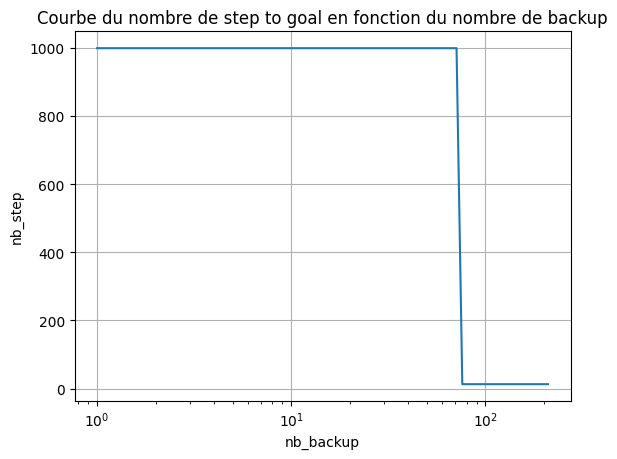

In [8]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Test SR

In [12]:
from SuccessorRepresentation import FocusedDynaSR

fdsr = FocusedDynaSR(env_9x6, ALPHA, EPSILON, episode=500, train_episode_length=500, test_episode_length=1000)

fdsr.execute()

In [18]:
print("longueur du chemin au but minimal :",np.min(fdsr.test_lengths))

longueur du chemin au but minimal : 13


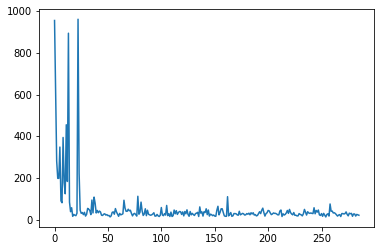

In [14]:
plt.plot(fdsr.test_lengths)

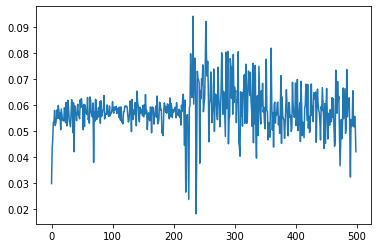

In [16]:
plt.plot(fdsr.lifetime_td_errors)

# Focus Dyna

In [12]:
QueueDyna = FocusedDyna(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = False, episode= 1000)
QueueDyna.execute()

TypeError: 'FocusedDyna' object is not callable

In [ ]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data["nb_step"]
nb_backup = data["nb_backup"]

plt.plot(nb_backup,nb_steps)


plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

In [ ]:
from heapq import heappop, heappush


test =[]

heappush(test, (1,[1,2,3]))
heappush(test, (2,[4,5,6]))
heappush(test, (3,[1,1,1]))
heappush(test, (1,[3,2,1]))
heappush(test, (1,[3,2,1]))

print(heappop(test))


(1, [1, 2, 3])


In [ ]:
import numpy as np
test =np.zeros((10,4))

print(test[0:])



[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
QueueDyna = LargestFirst(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = False, episode= 100)
QueueDyna.execute()
print("ok")
data = pd.read_csv("executionInformation.csv")

nb_steps1 = data["nb_step"]
nb_backup1 = data["nb_backup"]

QueueDyna = LargestFirst(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = False, episode= 100)
QueueDyna.execute()
print("ok")

data = pd.read_csv("executionInformation.csv")

nb_steps2 = data["nb_step"]
nb_backup2 = data["nb_backup"]

QueueDyna = LargestFirst(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = False, episode= 100)
QueueDyna.execute()
print("ok")

data = pd.read_csv("executionInformation.csv")

nb_steps3 = data["nb_step"]
nb_backup3 = data["nb_backup"]

max_len = max(len(nb_steps1),len(nb_steps2),len(nb_steps3))

mean_values = [(nb_steps1[i] + nb_steps2[i] + nb_steps3[i]) / 3 if i < len(nb_steps1) and i < len(nb_steps2) and i < len(nb_steps3) else None for i in range(max_len)]
if len(nb_backup1)== max_len:
    nb_backup =nb_backup1
if len(nb_backup2)== max_len:
    nb_backup == nb_backup2
else:
    nb_backup = nb_backup3
plt.plot(mean_values,nb_backup)




plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

Output()

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7a3d1ea45750>
Traceback (most recent call last):
  File "/home/jeanne/Documents/notes/LU3IN013/tp/tp_env/lib/python3.10/site-packages/matplotlib/transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))
KeyboardInterrupt: 


KeyboardInterrupt: 